# Import necessary libraries

In [1]:
import numpy as pd
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load data

In [3]:
loan_dataset = pd.read_csv('C:/Users/josep/Downloads/archive (9)/train_u6lujuX_CVtuZ9i (1).csv')

# View data

In [4]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_dataset.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
loan_dataset.shape

(614, 13)

In [7]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
loan_dataset.isnull().nunique()

Loan_ID              1
Gender               2
Married              2
Dependents           2
Education            1
Self_Employed        2
ApplicantIncome      1
CoapplicantIncome    1
LoanAmount           2
Loan_Amount_Term     2
Credit_History       2
Property_Area        1
Loan_Status          1
dtype: int64

# Checking data types of features and non-null count of features

In [10]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Making a check point

In [12]:
original_loan_dataset = loan_dataset.copy()

# Dropping missing values

In [13]:
loan_dataset = loan_dataset.dropna()

In [14]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
loan_dataset.shape

(480, 13)

#### Replace Yes or No with 1 and 0 for logic regression since this is a classification model 

In [17]:
loan_dataset.replace({'Loan_Status':{'N':0,'Y':1}}, inplace = True)

In [18]:
loan_dataset['Loan_Status']

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [19]:
loan_dataset['Loan_Status'].value_counts()

Loan_Status
1    332
0    148
Name: count, dtype: int64

##### checking the dependents values 

In [20]:
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [30]:
loan_dataset['Dependents'] = loan_dataset['Dependents'].replace(to_replace='3+', value=4)

In [31]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

# Data visualization

In [35]:
loan_dataset['Education'].value_counts()

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64

In [42]:
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [47]:
print(loan_dataset.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Property_Area  Loan_Status  
1             1.0         Rural            0  
2             1.0         Urban            1  
3             1.0

C:\Users\josep\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


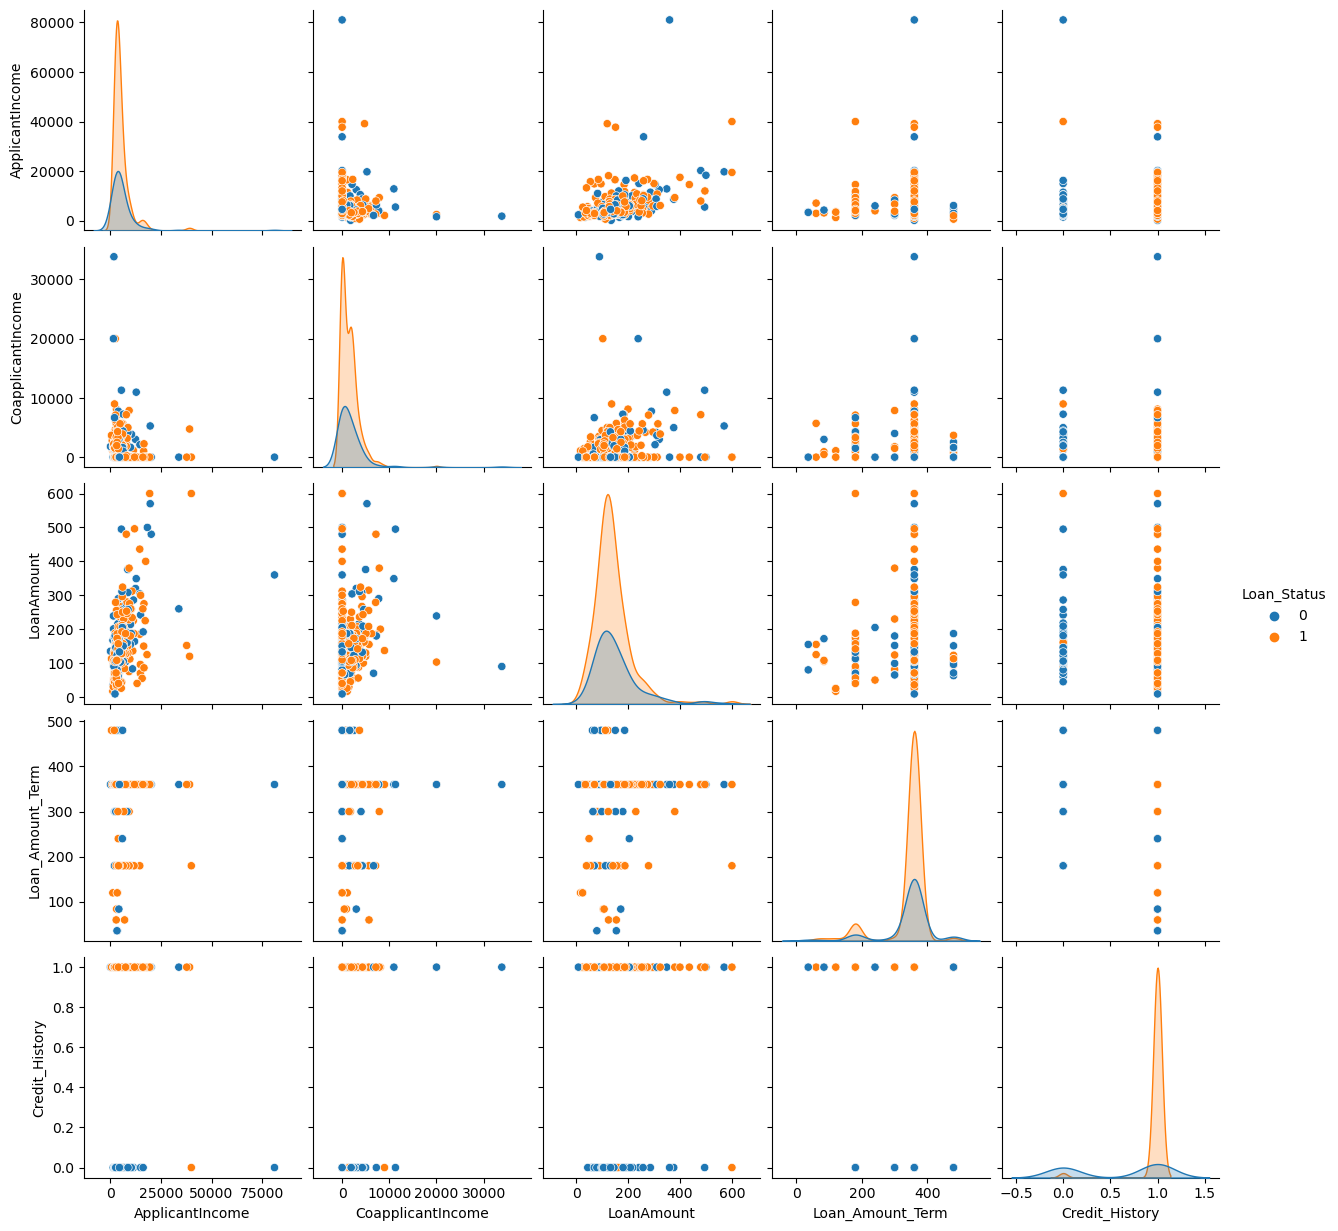

In [53]:
sns.pairplot(loan_dataset, hue='Loan_Status')
plt.show()

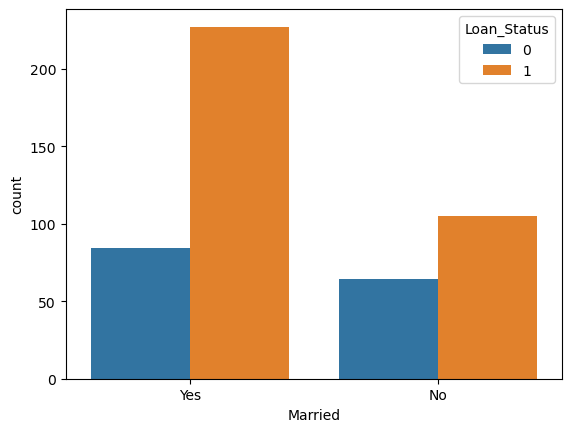

In [54]:
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)
plt.show()


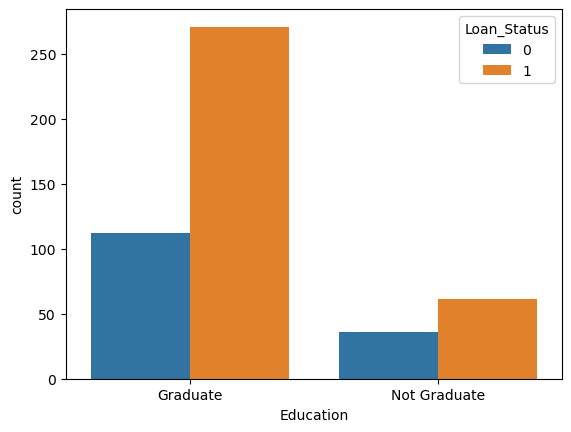

In [55]:
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)
plt.show()


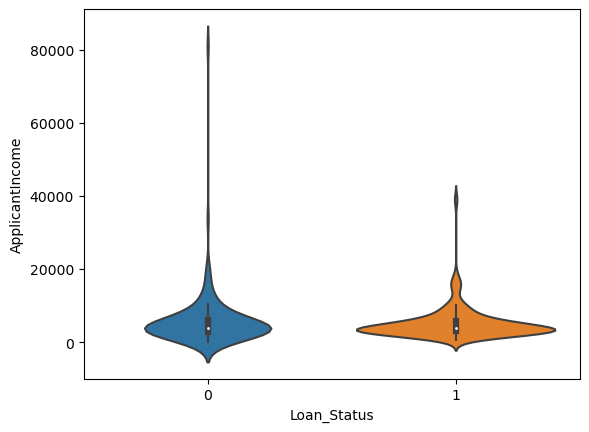

In [58]:
sns.violinplot(x='Loan_Status', y='ApplicantIncome', data=loan_dataset)
plt.show()

## CONVERTING CATEGORICAL DATA TO NUMERIC DATA

In [59]:
loan_dataset.replace({'Married':{'No':0,'Yes':1}}, inplace = True)

In [60]:
loan_dataset.replace({'Gender':{'Male':0,'Female':1}}, inplace = True)

In [61]:
loan_dataset.replace({'Education':{'Graduate':0,'Not Graduate':1}}, inplace = True)

In [62]:
loan_dataset.replace({'Self_Employed':{'No':0,'Yes':1}}, inplace = True)

In [65]:
loan_dataset.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}}, inplace = True)

In [66]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,1


# Splitting Features and Target

In [67]:
X = loan_dataset.drop(columns = ['Loan_ID','Loan_Status'])

In [68]:
y= loan_dataset['Loan_Status']

# Train Test Split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 2, stratify = y,test_size =0.1)

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((432, 11), (48, 11), (432,), (48,))

# Training the model: Support Vector Machine Model

In [80]:
classifier = svm.SVC(kernel ='linear')

In [81]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

# Model Evaluation

##### Accuracy score on training data

In [82]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)


In [83]:
print('Accuracy on traiining_data:',training_data_accuracy)

Accuracy on traiining_data: 0.7569444444444444


### Accuracy on test data

In [84]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [85]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.75
